In [1]:
import logging
import os
import pandas as pd
import re

from pathlib import Path

%load_ext autoreload
%autoreload 2

# Disable logging of the program in the notebook
os.environ["LOGLEVEL"] = "CRITICAL"

logging.basicConfig()
logging.root.setLevel(logging.INFO)
logging.basicConfig(level=logging.INFO)

logger = logging.getLogger('__main__')
logger.setLevel(os.environ.get("LOGLEVEL", logging.FATAL))

pybooklogger = logging.getLogger('pybook')
pybooklogger.setLevel(logging.DEBUG)

%aimport setup

from setup import *
from tad_help import TadRunner

# Track Layout
Calculate the layout of the dutch railway system


In [2]:
layout_file =   "../data/prorail/parsed/netherlands-schiphol.json"
layout = Layout(layout_file)

In [3]:
scenario_files = Path("../data/prorail/scenarios/TAD/TheHague")
save_dir = r"C:\Users\erick\Documents\uni\Thesis\delay-replannning\experiments\results\tad"

In [8]:
path_data = []
time_data = []
comp_data = []
for scenario_file in os.listdir(scenario_files):
# for scenario_file in ["2025-07-08_3.json"]:
    tad_exp = TadRunner(layout, scenario_files / scenario_file, save_dir)
    experiments = tad_exp.run("3500", "o", "GV", "ASDZ", timeout=600)
    experiments[0].metadata = {'color': 'Red',   'label': '@SIPP',    'offset': 0, 'linestyle': 3}
    experiments[1].metadata = {'color': 'Blue',  'label': 'FlexSIPP', 'offset': 0, 'linestyle': 3}

    tad_exp.plot(experiments, save="3500o-GV")
    tad_exp.plot([experiments[0]], save="3500o-GV/atsipp")
    tad_exp.plot([experiments[1]], save="3500o-GV/flexsipp")

    path_data.extend(get_path_data(experiments, tad_exp.agent_df, scenario=scenario_file))
    time_data.extend([exp.get_running_time() | exp.get_label() | {'scenario': scenario_file} for exp in experiments])
    comp_data.extend([exp.get_complexity()   | exp.get_label() | {'scenario': scenario_file} for exp in experiments])

path_df = pd.DataFrame(path_data)
path_df.to_csv(save_dir + "/3500o-Gv.csv")

time_df = pd.DataFrame(time_data)
time_df.to_csv(save_dir + "/3500o-Gv-time.csv")

comp_df = pd.DataFrame(comp_data)
comp_df.to_csv(save_dir + "/3500o-Gv-comp.csv")


..\data\prorail\scenarios\TAD\TheHague\2025-07-08_3.json


KeyboardInterrupt: 

In [3]:
save_dir = r"C:\Users\erick\Documents\uni\Thesis\delay-replannning\experiments\results-thesis\tad"
path_df = pd.read_csv(save_dir + "/3500o-Gv.csv", index_col=0)
path_df

,path,zeta,alpha,beta,delta,label,id,origin,destination,velocity,start_time,endTime,startTimeHuman,endTimeHuman,trainNumber,trainUnitTypes,stops,delay_location,delay_amount,scenario
0,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,442.93,92.27,1328.71,FlexSIPP,30,LEDN|5a,HNK|1,38.888889,600.0,5280.0,0:10:00,1:28:00,4156,['SNG'],"[{'expected_arrival': 900.0, 'location': 'SSH|...",r-Ledn|1030,0.0000,2025-07-03.json
1,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,442.93,128.52,1328.71,FlexSIPP,30,LEDN|5a,HNK|1,38.888889,600.0,5280.0,0:10:00,1:28:00,4156,['SNG'],"[{'expected_arrival': 900.0, 'location': 'SSH|...",r-Ledn|1030,0.0000,2025-07-03.json
2,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,442.93,128.52,1328.71,FlexSIPP,74,HFD|2,ASD|11a,38.888889,1320.0,2700.0,0:22:00,0:45:00,8156,['SNG'],"[{'expected_arrival': 1620.0, 'location': 'SHL...",r-Hfd_Shl|1776,0.0000,2025-07-03.json
3,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,442.93,149.79,1328.71,FlexSIPP,30,LEDN|5a,HNK|1,38.888889,600.0,5280.0,0:10:00,1:28:00,4156,['SNG'],"[{'expected_arrival': 900.0, 'location': 'SSH|...",r-Shl|1068,0.0000,2025-07-03.json
4,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,442.93,149.79,1328.71,FlexSIPP,74,HFD|2,ASD|11a,38.888889,1320.0,2700.0,0:22:00,0:45:00,8156,['SNG'],"[{'expected_arrival': 1620.0, 'location': 'SHL...",r-Hfd_Shl|1776,0.0000,2025-07-03.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,1228.05,846.34,1328.76,FlexSIPP,66,RTB|2,VL|3,38.888889,420.0,12000.0,0:07:00,3:20:00,3555,['VIRM'],"[{'expected_arrival': 600.0, 'location': 'RTD|...",r-Hfd|1138,57.2486,2025-07-21_3.json
931,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,1228.02,1081.90,1328.79,FlexSIPP,36,ASD|11a,GVC|12,38.888889,660.0,4080.0,0:11:00,1:08:00,2157,['VIRM'],"[{'expected_arrival': 960.0, 'location': 'ASS|...",r-Hfd|1152,0.0000,2025-07-21_3.json
932,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,1228.02,1081.90,1328.79,FlexSIPP,42,GVC|11,LLS|3,38.888889,480.0,6900.0,0:08:00,1:55:00,4353,['SLT'],"[{'expected_arrival': 720.0, 'location': 'LAA|...",r-Ledn|1030,0.0000,2025-07-21_3.json
933,r-Gv|244;r-Gv|1822;r-Laa|1820;r-Laa|1818;r-Gvm...,-inf,1228.02,1081.90,1328.79,FlexSIPP,45,RTD|12,LLS|3,38.888889,780.0,5400.0,0:13:00,1:30:00,9547,['UNKNOWN'],"[{'expected_arrival': 2400.0, 'location': 'SHL...",r-Shl|1064,0.0000,2025-07-21_3.json


In [5]:
allowed_delay = 180

def td_str(td):
    return ':'.join(re.split(r'[:.]+', str(td)) [1:3])

def extract_tipping_point(df):
    def apply_func(df):

        result=df.groupby("Delay Location").agg({
            "alpha": "min",
            "beta": "max",
            "Delay Amount": "max",
        })
        result = result.loc[result['alpha'] < 900]
        result["Tipping Point"] = result["alpha"].apply(lambda x: td_str(timedelta(seconds=x)))

        def tp_finder(x):
            new_tp = x['beta'] - max(0, x['Delay Amount'] - allowed_delay)
            if new_tp > 0:
                return td_str(timedelta(seconds=new_tp))
            return "-"

        # result[f"Tipping Point ({allowed_delay}s)"] = result.apply(tp_finder, axis=1)
        return result.sort_values("Tipping Point", ascending=True).drop(columns=["alpha", "beta"])

    df["Delay Location"] = df["Delay Location"].str.split("|").apply(lambda x: x[0])
    df = df.groupby(by='Train').apply(apply_func, include_groups=False)
    return df

tp_df = path_df.rename(columns={
    "delay_amount": "Delay Amount",
    "delay_location": "Delay Location",
    "trainNumber": "Train",
    "scenario": "Scenario",
    "label": "Label",
})

tp_df["Scenario"] = tp_df["Scenario"].apply(lambda x: x.split(".")[0])
tp_df["Delay Location"] = tp_df["Delay Location"].apply(lambda x: x.split("-")[1])
tp_df = tp_df.groupby(["Scenario"]).apply(extract_tipping_point, include_groups=False)
tp_df = tp_df.loc[tp_df.index.get_level_values('Scenario').astype(str).str.startswith("2025-07-08_3")]
# tp_df = tp_df.loc[tp_df.index.get_level_values('Train').astype(str).str.startswith("43")]
# tp_df = tp_df.loc[tp_df.index.get_level_values('Delay Location').astype(str).str.startswith("Ledn")]
tp_df.to_latex(save_dir + "/3500o-Gv.tex", escape=True)
tp_df

Delay Amount Tipping Point
Scenario     Train Delay Location                            
2025-07-08_3 2273  Gv                   0.00000         12:42
             3164  Ledn                 0.00000         08:21
             3575  Gv                   0.00000         11:06
             4166  Shl                197.69200         05:31
             4171  Ledn                 0.00000         05:40
             4364  Hfd                110.35900         08:25
             4373  Hfd                  0.00000         12:42
                   Shl                  5.68687         14:06
             18164 Hfd_Shl              0.00000         12:42

# Experiment Runtime
Take a route of an agent with many stops, and run from start to every stop as an experiment

## Results


### ATF Plot

### Blocking staircase diagram
Showing the route of the agent with the most stops, its quite long.


In [4]:
tad_exp = TadRunner(layout, scenario_files / "2025-07-21_1.json", save_dir)
experiments = tad_exp.run("3500", "o", "GV", "ASDZ", timeout=1)

..\data\prorail\scenarios\TAD\TheHague\2025-07-21_1.json


INFO:pybook.setup:Setting up experiment {'start_time': np.float64(1140.0), 'origin': 'GV|6', 'destination': 'ASDZ|1', 'filter_agents': np.int64(41), 'metadata': {'offset': 0, 'color': 'Red', 'label': 'No flexibility'}, 'velocity': 38.888888888888886, 'max_buffer_time': 0, 'use_recovery_time': False}
INFO:pybook.setup:Setting up experiment {'start_time': np.float64(1140.0), 'origin': 'GV|6', 'destination': 'ASDZ|1', 'max_buffer_time': 900, 'use_recovery_time': True, 'filter_agents': np.int64(41), 'metadata': {'color': 'Blue', 'label': 'Recovery time', 'offset': 0}, 'velocity': 38.888888888888886}
DEBUG:pybook.setup:Running: ../search/buildDir/atsipp.exe --start r-Gv|244 --goal r-Asdzo|766 --edgegraph output --search repeat --startTime 1140.0
ERROR:pybook.setup:Timeout for repeat (1s) expired
DEBUG:pybook.setup:results of <setup.Experiment object at 0x000001CFC00CF970>: None
DEBUG:pybook.setup:Running: ../search/buildDir/atsipp.exe --start r-Gv|244 --goal r-Asdzo|766 --edgegraph output -

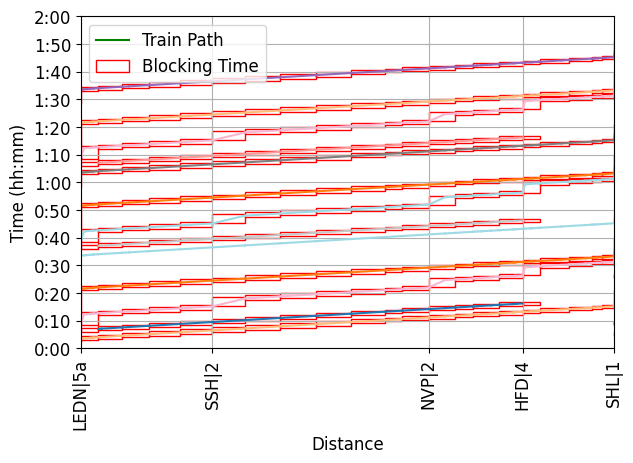

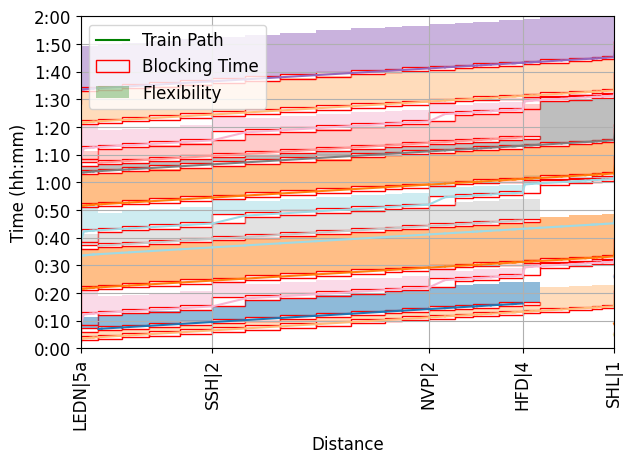

In [5]:
kwargs = {'min_y': 0*60, 'max_y': (120)*60}
for exp in experiments:
    exp.s.plot(exp.agent.id, exp.block_intervals, exp.buffer_times, exp.recovery_times, True, start="LEDN|", end="SHL|", savefig=f"{save_dir}/2025-07-21_1/blocking_staircase_{exp.metadata['label'].replace(' ', '_')}.png", **kwargs)